In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('full_data.csv')
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [3]:
df.shape

(4981, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [5]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

<AxesSubplot:>

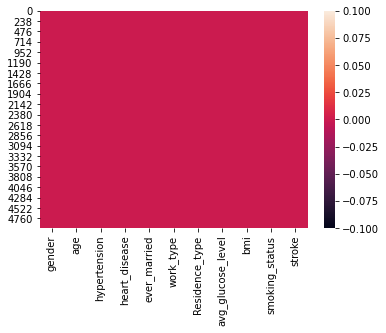

In [40]:
sns.heatmap(df.isnull())

<AxesSubplot:xlabel='stroke', ylabel='count'>

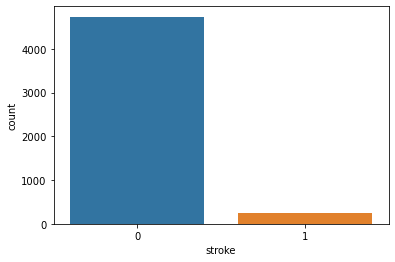

In [42]:
sns.countplot(x='stroke',data=df)

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
lab=LabelEncoder()

In [8]:
df['smoking_status']=lab.fit_transform(df['smoking_status'])

In [9]:
df['Residence_type']=lab.fit_transform(df['Residence_type'])
df['work_type']=lab.fit_transform(df['work_type'])
df['ever_married']= lab.fit_transform(df['ever_married'])

In [10]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,1,1,1,228.69,36.6,1,1
1,Male,80.0,0,1,1,1,0,105.92,32.5,2,1
2,Female,49.0,0,0,1,1,1,171.23,34.4,3,1
3,Female,79.0,1,0,1,2,0,174.12,24.0,2,1
4,Male,81.0,0,0,1,1,1,186.21,29.0,1,1


In [11]:
df['gender']=lab.fit_transform(df['gender'])

In [12]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,1,1
1,1,80.0,0,1,1,1,0,105.92,32.5,2,1
2,0,49.0,0,0,1,1,1,171.23,34.4,3,1
3,0,79.0,1,0,1,2,0,174.12,24.0,2,1
4,1,81.0,0,0,1,1,1,186.21,29.0,1,1


<AxesSubplot:>

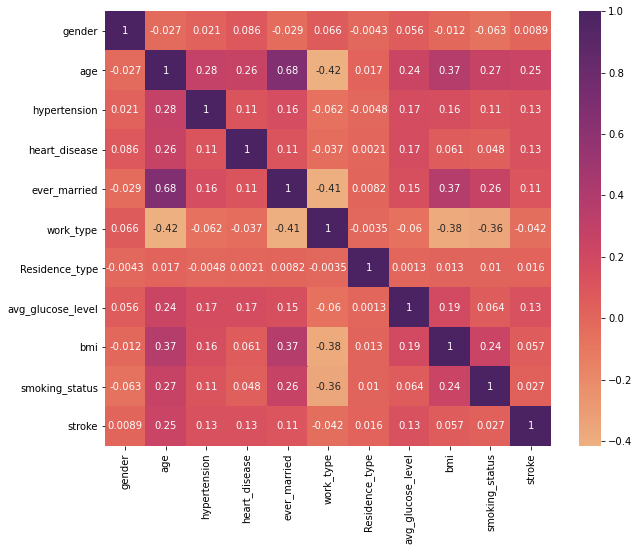

In [41]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='flare')

<Figure size 720x576 with 0 Axes>

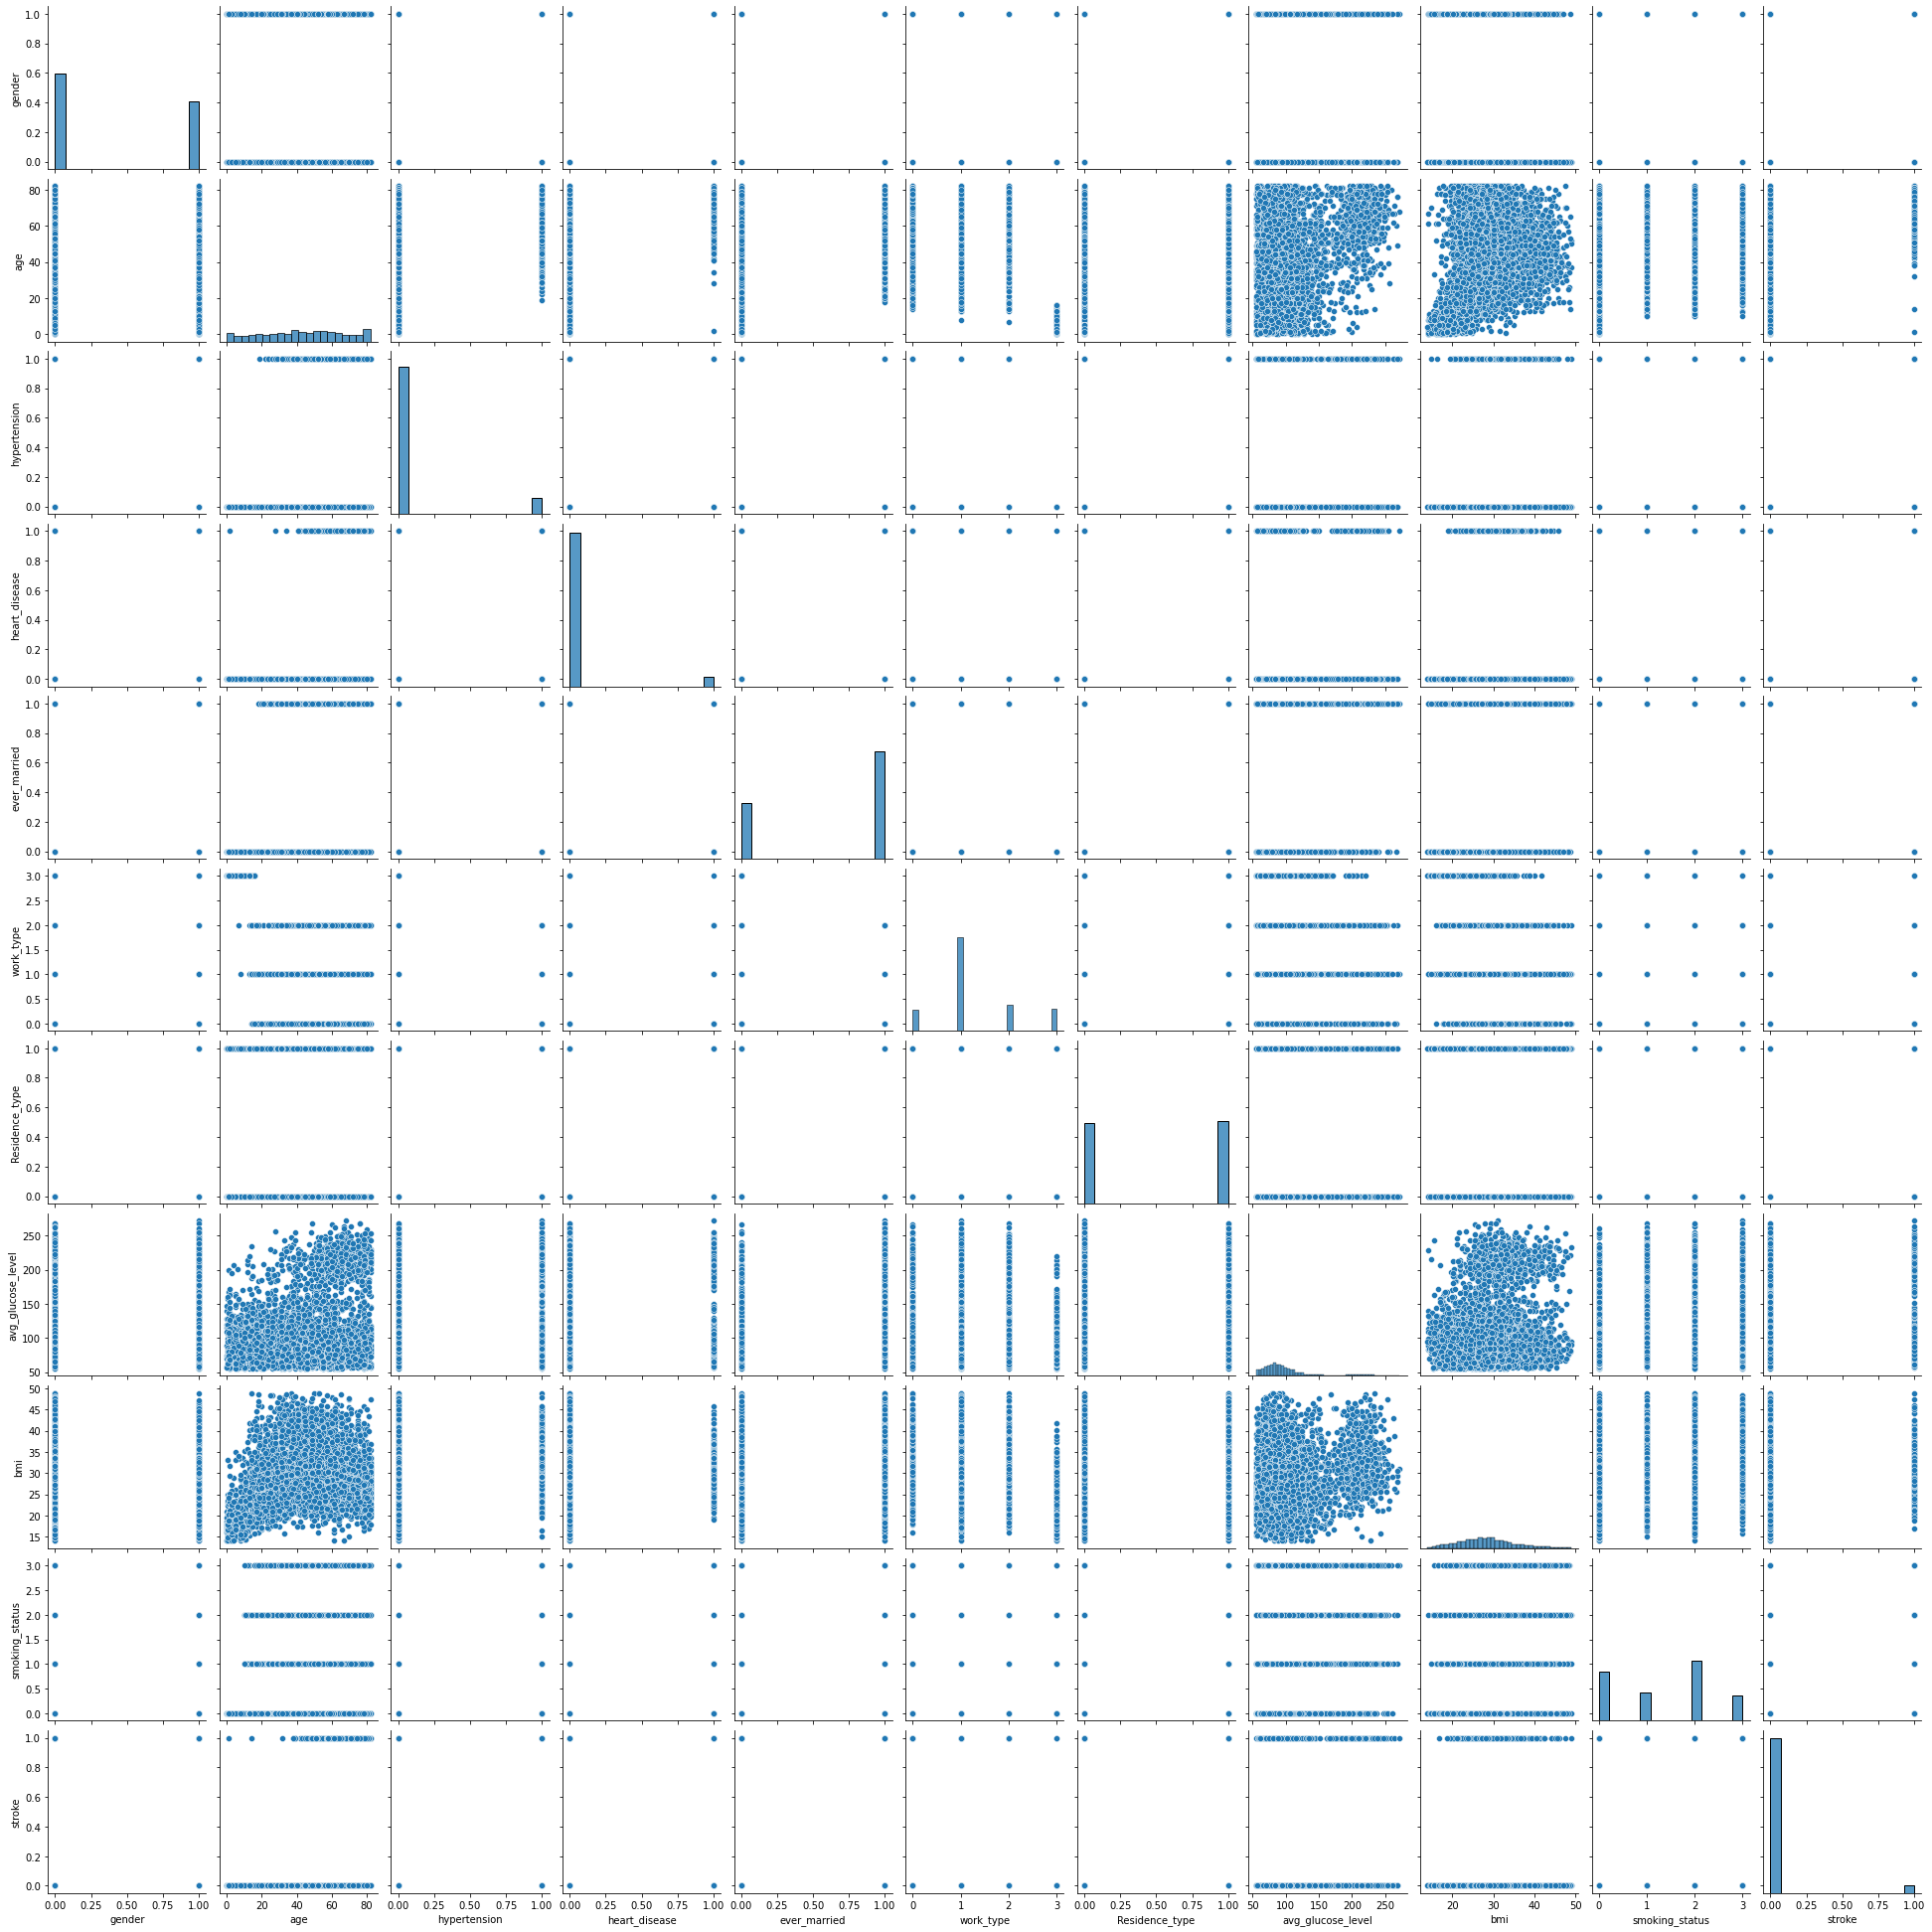

In [45]:
plt.figure(figsize=(10,8))
sns.pairplot(df)

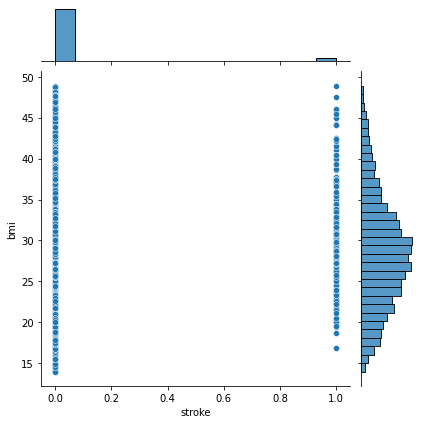

In [48]:
sns.jointplot(x='stroke',y='bmi',data=df)

In [13]:
x=df.drop(['stroke'], axis=1)
y= df['stroke']

In [15]:
y

0       1
1       1
2       1
3       1
4       1
       ..
4976    0
4977    0
4978    0
4979    0
4980    0
Name: stroke, Length: 4981, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split 

In [17]:
x_train, x_test,y_train,y_test=train_test_split(x,y, test_size=0.3)

In [18]:
x_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
2565,0,79.0,0,0,0,2,1,79.20,32.6,2
414,0,38.0,1,0,1,1,1,196.01,28.1,2
3599,0,73.0,0,0,1,1,0,81.78,28.8,2
1170,0,13.0,0,0,0,3,0,78.38,38.7,0
1465,0,17.0,0,0,0,0,0,115.93,23.3,2
...,...,...,...,...,...,...,...,...,...,...
2881,1,66.0,0,0,1,1,0,88.83,29.1,0
2039,0,66.0,0,0,1,0,0,152.02,44.2,1
3466,1,45.0,0,0,1,1,0,99.91,30.9,0
3921,1,48.0,0,0,1,1,1,78.85,43.2,2


In [19]:
x_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
4257,0,37.0,0,0,1,0,1,76.98,34.7,2
551,1,82.0,0,0,0,2,0,106.43,27.0,3
4532,1,75.0,0,0,1,0,0,93.93,24.4,1
4124,0,54.0,0,0,0,1,1,85.07,21.9,0
4024,1,65.0,0,0,1,2,1,179.67,30.7,1
...,...,...,...,...,...,...,...,...,...,...
2349,1,21.0,0,0,0,1,0,88.29,36.6,3
4144,0,73.0,1,0,1,2,0,124.78,35.6,2
3509,0,38.0,0,0,1,0,0,93.93,21.5,2
584,0,58.0,0,0,0,1,1,82.01,34.7,1


In [20]:
y_train

2565    0
414     0
3599    0
1170    0
1465    0
       ..
2881    0
2039    0
3466    0
3921    0
4111    0
Name: stroke, Length: 3486, dtype: int64

In [21]:
y_test

4257    0
551     0
4532    0
4124    0
4024    0
       ..
2349    0
4144    0
3509    0
584     0
4787    1
Name: stroke, Length: 1495, dtype: int64

In [23]:
from sklearn.linear_model import LogisticRegression 

In [24]:
model=LogisticRegression()

In [25]:
model.fit(x_train, y_train)

C:\Users\JALOTA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
predictions=model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [27]:
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [28]:
from sklearn.metrics import accuracy_score 

In [29]:
print(accuracy_score(y_test,predictions))

0.9377926421404682


In [32]:
model.predict([[2,0.5,3,22,1.3,1,2.0,2.2,1.2,2.0]])

array([1], dtype=int64)

In [33]:
import pickle

In [34]:
pickle.dump(model,open('Logistic Model.pkl','wb'))

In [35]:
loadedmodel=pickle.load(open('Logistic Model.pkl','rb'))

In [36]:
loadedmodel

LogisticRegression()

In [37]:
loadedmodel.predict([[2,0.5,3,22,1.3,1,2.0,2.2,1.2,2.0]])

array([1], dtype=int64)